# Cars&Bids dataset Data Cleaning and EDA

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# pointing to the copy of the data

file_path = 'path to your data goes here'

cars_df = pd.read_csv(file_path)

In [4]:
# checking the top of the dataset
cars_df.head()

,Make,Model,Mileage,VIN,Title Status,Location,Seller,Engine,Drivetrain,Transmission,...,URL,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
0,Audi,S6Save,"288,200",WAULA84A5SN121685,Clean (NC),"Raleigh, NC 27609",rustyone2022,2.2L Turbocharged I5,4WD/AWD,Manual (5-Speed),...,https://carsandbids.com/auctions/rxk84RwQ/1995...,1995-audi-s6-avant,1995,7700,Sold toTommyCarDoc,33,No reserve,9032.0,"Nov 18, 2022 3:49 PM EST",72
1,Ford,MaverickSave,200,3FTTW8E3XNRA95168,Clean (CA),"La Mesa, CA 91942",carDaveSD,2.5L Hybrid I4,Front-wheel drive,Automatic (CVT),...,https://carsandbids.com/auctions/rGN6Z7Q2/2022...,2022-ford-maverick-xlt,2022,29875,Sold toBluejeansjj,13,Reserve,7275.0,"Nov 18, 2022 1:51 PM EST",74
2,Nissan,GT-RSave,"39,500",JN1AR5EF5GM290729,Clean (MD),"Silver Spring, MD 20906",Fainmous,3.8L Turbocharged V6,4WD/AWD,Automatic (6-Speed),...,https://carsandbids.com/auctions/9WbPwOYQ/2016...,2016-nissan-gt-r-premium,2016,68000,Sold toMtnRunner784,26,Reserve,10609.0,"Nov 17, 2022 3:59 PM EST",51
3,Audi,R8Save,"10,400",WUABAAFX9J7902416,Clean (CA),"Temecula, CA 92592",Dustin1116,5.2L V10,Rear-wheel drive,Automatic (7-Speed),...,https://carsandbids.com/auctions/9X6kNN0x/2018...,2018-audi-r8-v10-coupe-rws,2018,135000,Sold tod_p_mac,26,Reserve,10057.0,"Nov 17, 2022 1:54 PM EST",62
4,Porsche,BoxsterSave,"55,400",WP0CA298X7U710301,Clean (IL),"Carol Stream, IL 60188",4wheels4me,2.7L Flat-6,Rear-wheel drive,Manual (5-Speed),...,https://carsandbids.com/auctions/KmmyjVYY/2007...,2007-porsche-boxster,2007,21000,Sold toLetsbuyone,22,Reserve,5528.0,"Nov 17, 2022 2:05 PM EST",99


In [5]:
# checking the bototm of the dataset, num_views is missing
cars_df.tail()

,Make,Model,Mileage,VIN,Title Status,Location,Seller,Engine,Drivetrain,Transmission,...,URL,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
9958,Land Rover,DefenderSave,"47,316",SALLDHMV8LA930542,Clean (SC),"Charleston, SC 29414",RelicImports,3.5L V8,4WD/AWD,Manual (5-speed),...,https://carsandbids.com/auctions/9nbW8GPJ/1994...,1994-land-rover-defender-6-wheeler,1994,32000,"Reserve not met, bid to",44,Reserve,NaN,"Jun 15, 2020 2:02 PM EDT",161
9959,Toyota,Land CruiserSave,"117,273",JT3FJ60G6E1116896,Clean (CO),"Denver, CO 80206",would,4.2L I6,4WD/AWD,Manual (4-speed),...,https://carsandbids.com/auctions/KVGJe7BP/1984...,1984-toyota-land-cruiser,1984,15000,Sold topetercpeterson,38,Reserve,NaN,"Jun 16, 2020 1:06 PM EDT",65
9960,Ford,Focus STSave,"44,388",1FADP3L97HL307089,Clean (OH),"Cincinnati, OH 41075",WillSanders,2.0L Turbocharged I4,Front-wheel drive,Manual (6-speed),...,https://carsandbids.com/auctions/rkJ5jd4g/2017...,2017-ford-focus-st,2017,16500,Sold toThis_is_Defkidd,47,Reserve,NaN,"Jun 23, 2020 1:07 PM EDT",82
9961,Mercedes-Benz,CLS 63 AMGSave,"28,927",WDDLJ7GB6EA106020,Clean (NC),"Jacksonville, FL 32207",pinmaniac,5.5L Twin-Turbocharged V8,4WD/AWD,Automatic (7-speed MCT),...,https://carsandbids.com/auctions/rjpanxeY/2014...,2014-mercedes-benz-cls63-amg-s,2014,37750,Sold toHeavenFox,29,Reserve,NaN,"Jun 23, 2020 2:02 PM EDT",72
9962,Toyota,MR2Save,"83,538",JT2AW15C7F0033655,Clean (PA),"Fairview, PA 16415",itwontstopsnowin,1.6L I4,Rear-wheel drive,Manual (5-speed),...,https://carsandbids.com/auctions/9XNWwoxg/1985...,1985-toyota-mr2,1985,6800,Sold toECRacer,18,Reserve,NaN,"Jun 18, 2020 1:01 PM EDT",93


In [6]:
#checking datatypes
cars_df.dtypes

Make                object
Model               object
Mileage             object
VIN                 object
Title Status        object
Location            object
Seller              object
Engine              object
Drivetrain          object
Transmission        object
Body Style          object
Exterior Color      object
Interior Color      object
Seller Type         object
URL                 object
id                  object
year                object
price                int64
auction_outcome     object
bid_count            int64
reserve_status      object
num_views          float64
end_datetime        object
num_photos           int64
dtype: object

In [7]:
# checking for missing values
cars_df.isnull().sum()
# lots of null values in the num_views column--this was expected. Imputation could be a good idea here

Make                  0
Model                 0
Mileage               0
VIN                   1
Title Status          0
Location              0
Seller                0
Engine                0
Drivetrain            0
Transmission          0
Body Style            0
Exterior Color        0
Interior Color        0
Seller Type           0
URL                   0
id                    0
year                  0
price                 0
auction_outcome       0
bid_count             0
reserve_status        0
num_views          1830
end_datetime          0
num_photos            0
dtype: int64

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

557000

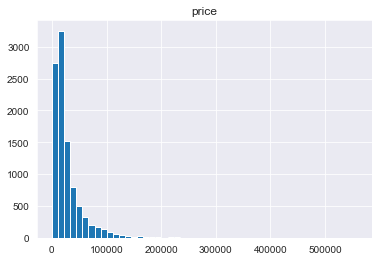

In [101]:
# target variable: price in USD

cars_df["price"] = pd.to_numeric(cars_df["price"])
cars_df.hist("price", bins = 50, range = (0, cars_df["price"].max()))
help(plt.hist)

cars_df["price"].max()
# somewhat exponentially distributed but big n

In [ ]:
# fixing the Model feature, which had 'Save' appended to each model name as a result of the scraping
cars_df["model_clean"] = cars_df["Model"].str[:-4]
cars_df["model_clean"]
cars_df["model_clean"].value_counts()
cars_df[cars_df["model_clean"] == "911"]

In [103]:
# taking a look at the id column to see if the trim info on the model can be extracted
# model info is separated with - in the URL but some model names are also separated with - Nissan GT-R for example
cars_df["id_split"] = cars_df["id"].str.split('-')
cars_df["id_split"]

0                         [1995, audi, s6, avant]
1                     [2022, ford, maverick, xlt]
2                  [2016, nissan, gt, r, premium]
3               [2018, audi, r8, v10, coupe, rws]
4                        [2007, porsche, boxster]
                          ...                    
9958    [1994, land, rover, defender, 6, wheeler]
9959                [1984, toyota, land, cruiser]
9960                      [2017, ford, focus, st]
9961        [2014, mercedes, benz, cls63, amg, s]
9962                          [1985, toyota, mr2]
Name: id_split, Length: 9963, dtype: object

array([[<AxesSubplot:title={'center':'mileage_clean'}>]], dtype=object)

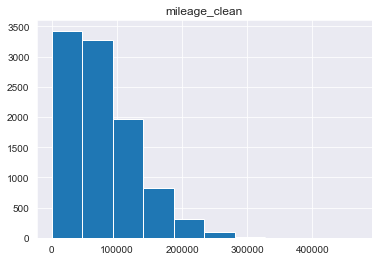

In [85]:
# fixing numeric columns that have commas in them
cars_df["mileage_clean"] = cars_df["Mileage"].str.extract('(.+[0-9])')
cars_df["mileage_clean"] = cars_df["mileage_clean"].str.replace('~', '')
cars_df["mileage_clean"] = pd.to_numeric(cars_df["mileage_clean"])
cars_df.hist("mileage_clean")

In [46]:
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.9/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

In [17]:
# splitting the location column into address elements
cars_df["ZIP"] = cars_df["Location"].str[-5:]
cars_df["State"] = cars_df["Location"].str[-8:-6]
cars_df["City"] = cars_df["Location"].str[:-10]
cars_df[["ZIP", "State", "City"]]
cars_df["State"].value_counts()
# some weirdness with canada

CA    1974
FL     941
TX     683
NY     485
PA     444
      ... 
ur       1
V,       1
fi       1
A,       1
A        1
Name: State, Length: 91, dtype: int64

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

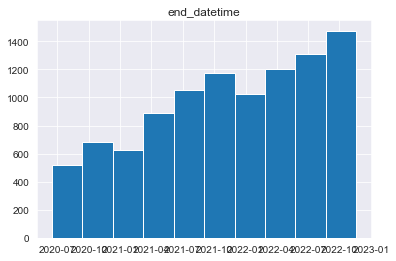

In [104]:
# converting the auction end format
cars_df["end_datetime"] = pd.to_datetime(cars_df["end_datetime"])
cars_df.hist("end_datetime")
help(plt.hist)

In [105]:
# splitting the title status column into location and description
cars_df["title_location"] = cars_df["Title Status"].str.extract('\((.+)\)')
cars_df["title_desc"] = cars_df["Title Status"].str.extract('(^.+)\(')
cars_df["title_desc"]

0       Clean 
1       Clean 
2       Clean 
3       Clean 
4       Clean 
         ...  
9958    Clean 
9959    Clean 
9960    Clean 
9961    Clean 
9962    Clean 
Name: title_desc, Length: 9963, dtype: object

In [158]:
cars_df["title_desc"].value_counts()

Clean                            9788
Registered                         36
Not Actual Mileage                 16
Rebuilt                            11
Salvage                             9
Exceeds Mechanical Limits           6
Lemon Law Buyback                   4
 Clean                              3
Salvaged                            3
Bonded                              3
NAM                                 3
Lemon Law Repurchase                3
VA                                  2
Branded                             2
Reconstructed                       2
Odometer Discrepancy                2
Salvage/Rebuilt                     2
Bill of Sale                        2
Rebuilt/Salvage                     1
Colorado                            1
Clean                               1
Off-Highway Use Only                1
Clean                               1
Rebuilt/Manufacturer Buyback        1
 Not Actual Mileage                 1
Iowa                                1
Lemon       

In [142]:
cars_df[cars_df["title_desc"].isna()]

,Make,Model,Mileage,VIN,Title Status,Location,Seller,Engine,Drivetrain,Transmission,...,bid_count,reserve_status,num_views,end_datetime,num_photos,ZIP,State,City,title_location,title_desc
335,Chevrolet,Camaro,TMU - No odometer,2012 #55,No Title,"Wilmette, IL 60091",LittleCash,5.3L Supercharged V8,Rear-wheel drive,Automatic (2-Speed),...,22,Reserve,13021.0,2022-10-28 15:40:00-04:00,85,60091,IL,Wilmette,NaN,NaN
3166,Suspensions Unlimited,Sand Pro 2,No Odometer - TMU,NaN,Bill of Sale,"La Habra, CA 90631",brad87s,3.5L Turbocharged V6,Rear-wheel drive,Manual (4-Speed),...,42,No reserve,10176.0,2022-04-29 13:50:00-04:00,92,90631,CA,La Habra,NaN,NaN
3175,Smart,Crossblade,15900,WME01MC012H095579,No Title,"Los Angeles, CA 90036",PeteAutoMuseum,0.6L Turbocharged I3,Rear-wheel drive,Automatic (6-Speed),...,55,No reserve,71109.0,2022-04-28 13:29:00-04:00,70,90036,CA,Los Angeles,NaN,NaN
4189,Toyota,Land Cruiser,113500,JT3DJ81W0S0096266,Clean,"West Fargo, ND 58078",Dangler,4.5L I6,4WD/AWD,Automatic (4-Speed),...,25,Reserve,11713.0,2022-02-10 15:09:00-05:00,95,58078,ND,West Fargo,NaN,NaN
4281,Ford,Mustang Mach-E,75,3FMTK4SE6MME03373,Never Titled,"Petoskey, MI 49770",mfalma,Dual Electric Motors,4WD/AWD,Automatic,...,44,Reserve,14123.0,2022-02-02 15:20:00-05:00,49,49770,MI,Petoskey,NaN,NaN
4800,AC,3000ME,3800 Miles Shown - TMU,ME301RE0000186000,AL Registration,"Belle Chasse, LA 70037",bgravolet,3.0L V6,Rear-wheel drive,Manual (5-Speed),...,7,Reserve,17211.0,2021-12-15 13:30:00-05:00,99,70037,LA,Belle Chasse,NaN,NaN
5023,Porsche,Macan,47000,WP1AF2A51FLB48351,Clean,"Charleston, SC 29412",n8naylor,3.6L Turbocharged V6,4WD/AWD,Automatic (7-Speed),...,27,Reserve,8483.0,2021-11-26 15:09:00-05:00,89,29412,SC,Charleston,NaN,NaN
5099,Mazda,Mazdaspeed 3,100900,JM1BK34M271628938,Clean,"San Diego, CA 92121",sassafras1232,2.3L Turbocharged I4,Front-wheel drive,Manual (6-Speed),...,38,No reserve,8564.0,2021-11-23 13:42:00-05:00,142,92121,CA,San Diego,NaN,NaN
5224,BMW,M3,140400,WBSBR93452EX23469,Clean,"Fort Pierce, FL 34982",edgarcia,3.2L I6,Rear-wheel drive,Manual (6-Speed),...,21,Reserve,6531.0,2021-11-10 14:43:00-05:00,100,34982,FL,Fort Pierce,NaN,NaN
5377,Freightliner,Sprinter,25,W2W4EBVY9MT055538,Never Titled - MSO,"Wilsonville, OR 97070",OutNUpfitters,3.0L Turbodiesel V6,4WD/AWD,Automatic (7-Speed),...,65,Reserve,20812.0,2021-10-29 14:46:00-04:00,63,97070,OR,Wilsonville,NaN,NaN


In [143]:
cars_df["State"].value_counts()

CA    1974
FL     941
TX     683
NY     485
PA     444
      ... 
ur       1
V,       1
fi       1
A,       1
A        1
Name: State, Length: 91, dtype: int64

In [159]:
cars_df["Seller Type"].value_counts()

Private Party                                 7932
Dealer                                        1760
Dealer ($40 Temporary Tag)                      15
Dealer ($40 Temp Tag)                           13
Private Party (Lien on title)                   10
                                              ... 
Dealer ($99 Fee for California Buyers)           1
Dealer (GA Sales Tax + $137 Temporary Tag)       1
Dealer ($99 Document Fee)                        1
Dealer ($250)                                    1
Dealer (Sales Tax & Title Fees)                  1
Name: Seller Type, Length: 166, dtype: int64

In [179]:
# cars_df['int_year'] = cars_df[cars_df["year"] != 'consumer'].["year"].astype(int)
cars_df.isnull().sum()

Make                  0
Model                 0
Mileage               0
VIN                   1
Title Status          0
Location              0
Seller                0
Engine                0
Drivetrain            0
Transmission          0
Body Style            0
Exterior Color        0
Interior Color        0
Seller Type           0
URL                   0
id                    0
year                  0
price                 0
auction_outcome       0
bid_count             0
reserve_status        0
num_views          1830
end_datetime          0
num_photos            0
ZIP                   0
State                 0
City                  0
title_location       55
title_desc           52
dtype: int64

In [180]:
cars_df.duplicated().sum()

0

In [182]:
cars_df["Make"].value_counts()

BMW                  1734
Mercedes-Benz        1108
Porsche               767
Ford                  658
Toyota                654
                     ... 
Backdraft Racing        1
Race Car Replicas       1
Skoda                   1
MEV                     1
Shelby                  1
Name: Make, Length: 112, dtype: int64

In [183]:
# kNN algorithm to cluster cars then create models from there
# regression trees to break the larger set into digestible groups and then create regression models from there
# can also try splitting by brand and by body style or both

cars_df["Body Style"].value_counts()

Coupe            2385
Sedan            2339
SUV/Crossover    1772
Convertible      1677
Truck             610
Wagon             573
Hatchback         450
Van/Minivan       157
Name: Body Style, dtype: int64

In [4]:
cars_df["Title Status"].value_counts()

Clean (CA)                   1826
Clean (FL)                    866
Clean (TX)                    650
Clean (PA)                    463
Clean (NY)                    443
                             ... 
Lemon Law Repurchase (IL)       1
NAM (GA)                        1
Never Titled                    1
Rebuilt (MD)                    1
Clean (SD)                      1
Name: Title Status, Length: 191, dtype: int64

In [5]:
cars_df["Engine"].value_counts()

3.0L Turbocharged I6         392
2.0L Turbocharged I4         351
5.0L V8                      318
5.7L V8                      310
3.2L I6                      283
                            ... 
2.9L Flat 6                    1
5.9 Turbodiesel I6             1
2.5L Turbodiesel Inline-4      1
 5.0L V12                      1
6.75 V12                       1
Name: Engine, Length: 569, dtype: int64

In [10]:
cars_df["year"].value_counts()

2008        461
2006        436
2004        412
2003        388
2007        384
2005        376
2013        366
2001        359
2016        350
2002        338
2015        327
2014        323
2000        318
2011        311
2017        310
2018        277
1995        273
2012        263
1999        250
1994        236
2022        229
2009        228
1996        227
2019        219
2010        211
1997        201
1991        187
2021        183
1992        176
2020        167
1993        161
1990        159
1998        157
1989        117
1988        115
1986        107
1987        106
1985         74
1984         56
1982         43
1983         42
1981         27
2023         12
consumer      1
Name: year, dtype: int64

In [20]:
cars_df["num_photos"].dtype

dtype('int64')

In [ ]:
# function to change